In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

In [25]:
model = tf.keras.models.load_model('asia_plant_b0_efficientnet_v2.h5')

In [98]:
os.chdir('F:\\dataScience\\304x deep learning\\p3 cnn tensorflow\\đồ án\\source code')

In [3]:
classes = ['bamboo',
 'banana',
 'cacao',
 'cinnamon',
 'coffeearabica',
 'dragonfruit',
 'durian',
 'frangipani',
 'guava',
 'jackfruit',
 'lychee',
 'mango',
 'mangosteen',
 'nilam',
 'papaya',
 'passiflora',
 'sawo',
 'snakefruit',
 'starfruit',
 'sugarpalm',
 'suweg',
 'taro',
 'vanilla',
 'waterguava',
 'whitepepper',
 'zodia']

hiển thị 1 số hình ảnh

In [26]:
img_list = [i for i in os.listdir() if i.split('.')[-1] in ('jpg','png')]
img_list

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '102.jpg']

1.jpg


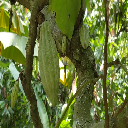

10.jpg


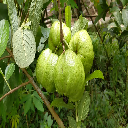

100.jpg


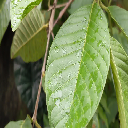

1000.jpg


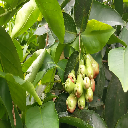

1001.jpg


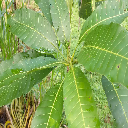

102.jpg


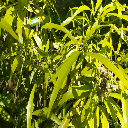

In [103]:
for img in img_list:
    print(img)
    display(tf.keras.preprocessing.image.load_img(img,target_size = (128,128)))

thực hiện chạy model trên hình ảnh

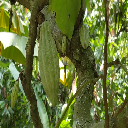

cacao:100.00 %


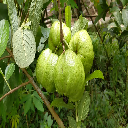

guava:100.00 %


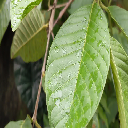

guava:100.00 %


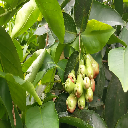

waterguava:100.00 %


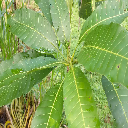

mango:99.99 %


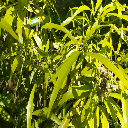

zodia:99.98 %


In [27]:
def predict_effb0(model,filename):
    img = tf.keras.preprocessing.image.load_img(filename,target_size = (128,128))
    display(img)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    pred = model.predict(np.expand_dims(img,0))
    i = np.argmax(pred)
    return('%s:%.2f %%'%(classes[i],max(pred.squeeze())*100))
    

for img in img_list:
    print(predict_effb0(model,img))

sử dụng api để làm sever

In [28]:

from io import BytesIO

import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions

model = None


def load_model():
    model = tf.keras.models.load_model('asia_plant_b0_efficientnet_v2.h5')
    print("Model loaded")
    return model

classes = ['bamboo',
 'banana',
 'cacao',
 'cinnamon',
 'coffeearabica',
 'dragonfruit',
 'durian',
 'frangipani',
 'guava',
 'jackfruit',
 'lychee',
 'mango',
 'mangosteen',
 'nilam',
 'papaya',
 'passiflora',
 'sawo',
 'snakefruit',
 'starfruit',
 'sugarpalm',
 'suweg',
 'taro',
 'vanilla',
 'waterguava',
 'whitepepper',
 'zodia']


def predict(image: Image.Image):
    global model
    global classes
    if model is None:
        model = load_model()

    image = np.asarray(image.resize((128, 128)))[..., :3]
    img = tf.keras.applications.efficientnet.preprocess_input(image)
    img = np.expand_dims(img, 0)
    

    result = model.predict(img)
    response = []
    for i in np.argsort(result)[-2:]:
        response.append({classes[i]:'%.2f %%'%(result.squeeze()[i]*100)})

    return response


def read_imagefile(file) -> Image.Image:
    image = Image.open(BytesIO(file))
    return 

In [29]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse
import os

In [30]:
import uvicorn
from fastapi import FastAPI, File, UploadFile
from starlette.responses import RedirectResponse


app_desc = """<h2>Try this app by uploading any image with `predict/image`</h2>
<h2>Try Covid symptom checker api - it is just a learning app demo</h2>
<br>by Aniket Maurya"""

app = FastAPI(title='Tensorflow FastAPI Starter Pack', description=app_desc)


@app.get("/", include_in_schema=False)
async def index():
    return RedirectResponse(url="/docs")


@app.post("/predict/image")
async def predict_api(file: UploadFile = File(...)):
    extension = file.filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not extension:
        return "Image must be jpg or png format!"
    image = read_imagefile(await file.read())
    prediction = predict(image)

    return prediction


if __name__ == "__main__":
    uvicorn.run(app, debug=True)


INFO:     Started server process [5496]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:56721 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:56721 - "GET /openapi.json HTTP/1.1" 200 OK
Model loaded
INFO:     127.0.0.1:56730 - "POST /predict/image HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 366, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 75, in __call__
    return await self.app(scope, receive, send)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\uvicorn\middleware\debug.py", line 96, in __call__
    raise exc from None
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\uvicorn\middleware\debug.py", line 93, in __call__
    await self.app(scope, receive, inner_send)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\fastapi\applications.py", line 269, in __call__
    await super().__call__(scope, receive, send)
  File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\starlette\applications.py",

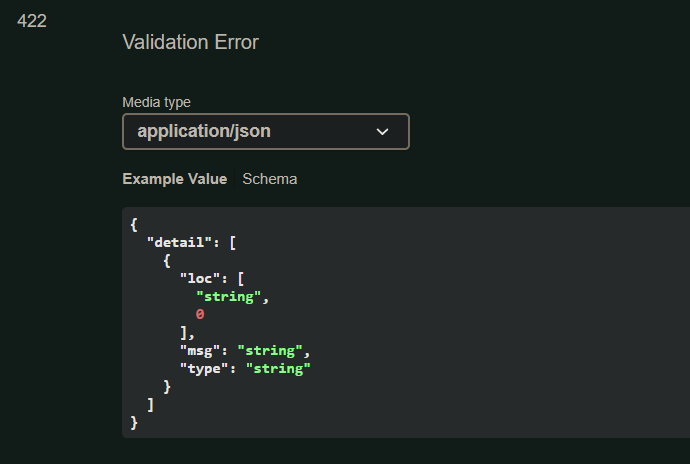

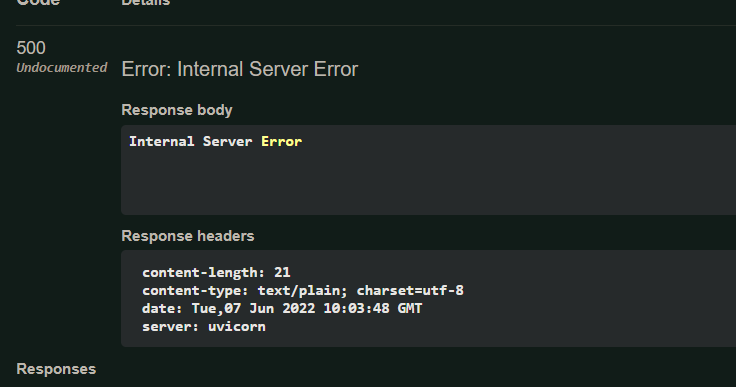